In [77]:
import numpy as np
import matplotlib.pyplot as plt

from echo.esn import EchoStateNetwork
from echo.plotter import plot_n_units

%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def mackeyglass(N):
    import scipy.signal
    
    b = 0.1
    c = 0.2
    tau = 18
    result = np.zeros(N)
    
    result[:18] = [0.9697, 0.9699, 0.9794, 1.0003, 1.0319, 1.0703, 1.1076,1.1352, 1.1485,
         1.1482, 1.1383, 1.1234, 1.1072, 1.0928, 1.0820, 1.0756, 1.0739, 1.0759]
    
    for i in range(18, N):
        result[i] = result[i-1] - b * result[i-1] + c * result[i-tau] / (1.0 + result[i - tau]**10)
    return result[:, None]


In [3]:
mg_teacher = mackeyglass(10000)

In [117]:
net = EchoStateNetwork(1000, 1, 1, spectral_radius=1.8, sparsity=0.99, noise=0.001, random_state=11)

In [114]:
result = net.fit(np.ones((3000, 1)), mg_teacher[:3000], exclude_steps=1000)

In [9]:
predicted = net.predict(np.ones((3000, 1)))

<IPython.core.display.Javascript object>


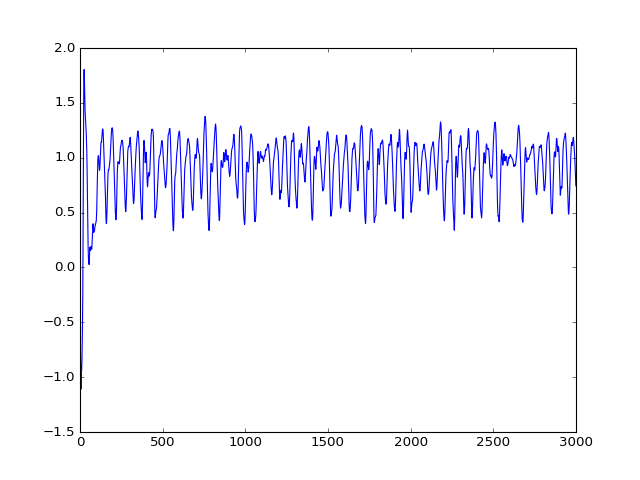

In [10]:
plt.plot(predicted["outputs"])
plt.show()

test error: 
2.85777553228


<IPython.core.display.Javascript object>


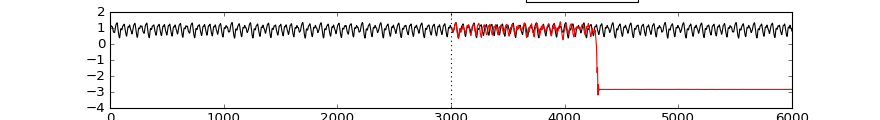

In [125]:
trainlen = 3000
future = 3000

fit_result = net.fit(np.ones((trainlen, 1)), mg_teacher[:trainlen], exclude_steps=1000)

pred_result = net.predict(np.ones((future, 1)),
                         initial_state=fit_result["r"][-1],
                         initial_input=fit_result["inputs"][-1],
                         initial_output=fit_result["outputs"][-1])
prediction = pred_result["outputs"]

print("test error: \n"+str(np.sqrt(np.mean((prediction.flatten() - mg_teacher[trainlen:trainlen+future])**2))))

plt.figure(figsize=(11,1.5))
plt.plot(range(0,trainlen+future),mg_teacher[0:trainlen+future],'k',label="target system")
plt.plot(range(trainlen,trainlen+future),prediction,'r', label="free running ESN")
lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:')
plt.legend(loc=(0.61,1.1),fontsize='x-small')

<IPython.core.display.Javascript object>


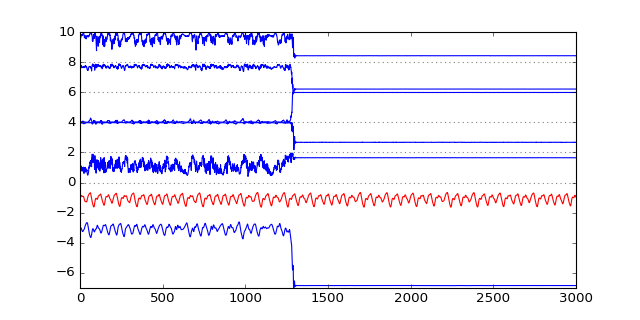

(-7.0, 10.0)

In [126]:
plot_n_units(pred_result["r"], 5, steps=3000)
plt.plot(mg_teacher[:len(pred_result["r"]), 0] - 2, color="red")
plt.plot(pred_result["outputs"] - 4)
plt.ylim(plt.ylim()[0] - 7, plt.ylim()[1])


In [115]:
pred_result = net.predict(np.zeros((future, 1)),
                         initial_state=fit_result["r"][-1],
                         initial_input=fit_result["inputs"][-1],
                         initial_output=fit_result["outputs"][-1])
